Name: Jolene Branch

Date: August 2, 2020

Class: DSC550

Assignment: K Nearest Neighbor (week 6 exercise 12.4.3)

Consider the following one-dimensional training set:
(1,1), (2,2), (4,3), (8,4), (16,5), (32,6)

Describe the function f(q), the label that is returned in response to the query q, when the interpolation used is:

(a) The label of the nearest neighbor

In [1]:
import numpy as np
points = np.array([[1,1],[2,2],[4,3],[8,4],[16,5],[32,6]])         # in (x,y), x is the vector

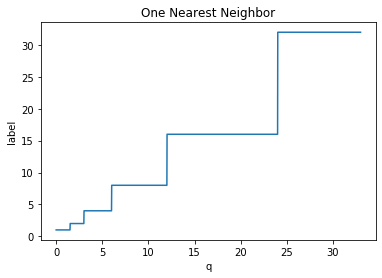

In [2]:
# help from S.Sears on Tuesday evening class call

import matplotlib.pyplot as plt

def nn_interpolation(train, q):               # will call this function in a for loop at the very end and pass the 'points'
    """
    Takes train (x,y) data set and returns y for q-query data point based on one nearest neighbor.
    """
    nearest_dist = 99999                      # arbitrary large starting distance, to make sure the 'if' statement works
    i = 0
    for point in train:                       # This is actually the array of vectors, being looped through
        x = point[0]
        y = point[i]
        if abs(q - x) < nearest_dist:
            nearest_dist = abs(q - x)         # if you already know you are there, you can keep the y
            label = y
    return label

x = np.arange(0, 33, 0.01)
y = np.array([])
for q in x:
    y = np.append(y, nn_interpolation(points, q))          # Loop through all the vectors and compute y for each x, or f(q)
    
plt.plot(x,y)
plt.xlabel('q')
plt.ylabel('label')
plt.title('One Nearest Neighbor')
plt.show()
# This output doesn't look right

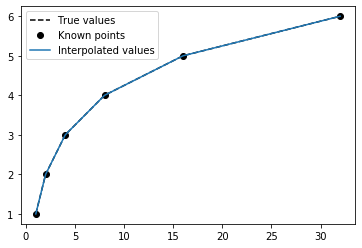

In [3]:
# from https://mmas.github.io/interpolation-scipy
# This is how Andrea did it.  The code is much easier.
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

x = np.array([1,2,4,8,16,32])
y = np.array([1,2,3,4,5,6])
n = 1
xn = x*n

f = interpolate.interp1d(x,y, kind='nearest')
yn = f(xn)

plt.plot(xn, yn, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn, label='Interpolated values')
plt.legend()
plt.show()

(b) The average of the labels of the two nearest neighbors

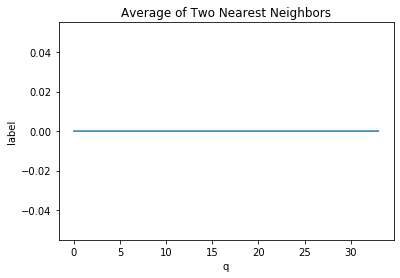

In [4]:
# help from S.Sears on Tuesday evening class call

import matplotlib.pyplot as plt
import numpy as np

def two_nn_interpolation(train, q):      # will call this function in a for loop at the very end and pass the 'points'
    """
    Takes train (x,y) data set and returns y for q-query data point based on average of two nearest neighbors.
    """
    distances = []                        # create empty list to store the absolute value differences
    i = 0
    for point in train:
        x = point[0]
        y = point[i]
        distances.append(abs(q-x))
        
    smallest = 9999                       # arbitrary large starting distance
    smallest_i = 0                        # starting smallest index, index of closest neighbor
    second_smallest = 9999                # arbitrary large starting distance
    second_smallest_1 = 0                 # starting second smallest index, index of second closest neighbor
    for i in range(len(distances)):
        if distances[i] < smallest:
            smallest = distances[i]
            smallest_i = 1
    for i in range(len(distances)):
        if distances[i] < second_smallest and i != smallest_i:
            second_smallest = distances[i]
            second_smallest_1 = 1
            
    ave_of_labels = (train[smallest_i][1] - train[second_smallest_1][1]) / 2
    
    return ave_of_labels

x = np.arange(0, 33, 0.01)
y = np.array([])
for q in x:
    y = np.append(y, two_nn_interpolation(points, q))        # Compute y for each x, or f(q)
    
plt.plot(x,y)
plt.xlabel('q')
plt.ylabel('label')
plt.title('Average of Two Nearest Neighbors')
plt.show()

# Hmm.  This doesn't look quite right!